<center><h1 style="color:#173F8A;"> Cálculo Científico I, MAT2605, 2025-2 </h1></center>
<h3 style="color:#173F8A;text-align:left;"> Facultad de Matemáticas<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:left;"> Profesor: Manuel A. Sanchez<br> </h3>
<h4 style="color:#0176DE;text-align:left;"> Ayudantes: Tomás Malfetano (tomas.malfetano@uc.cl), Diego Vera (dva@uc.cl)<br> </h4>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="200" height="400"><br><br><br><br><br>
</figure>
 -->
<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

# Ayudantía 12

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Problema 1

a) Calcule el polinomio interpolador de Hermite de grado $3$ de la función $f(x) = x^5$ con puntos $(x_0, x_1) = (0, a)$.

b) Determine el polinomio de Hermite de interpolación para los datos $y(1) = 1$, $y'(1) = 2$, $y(2) = 0$, $y'(2) = 2$ y de una cota para el error de interpolación en el intervalo $[1, 2]$ sabiendo que $\max_{x\in [1, 2]}|y^{(4)}(x)| \leq 1/10$.

## Problema 2

Considere la función $f(x) = e^x$. Interpole esta función a pedazos con polinomios de grado 2 en $x \in\{-1, 0, 1\}$. Grafique las derivadas de su función interpoladora.

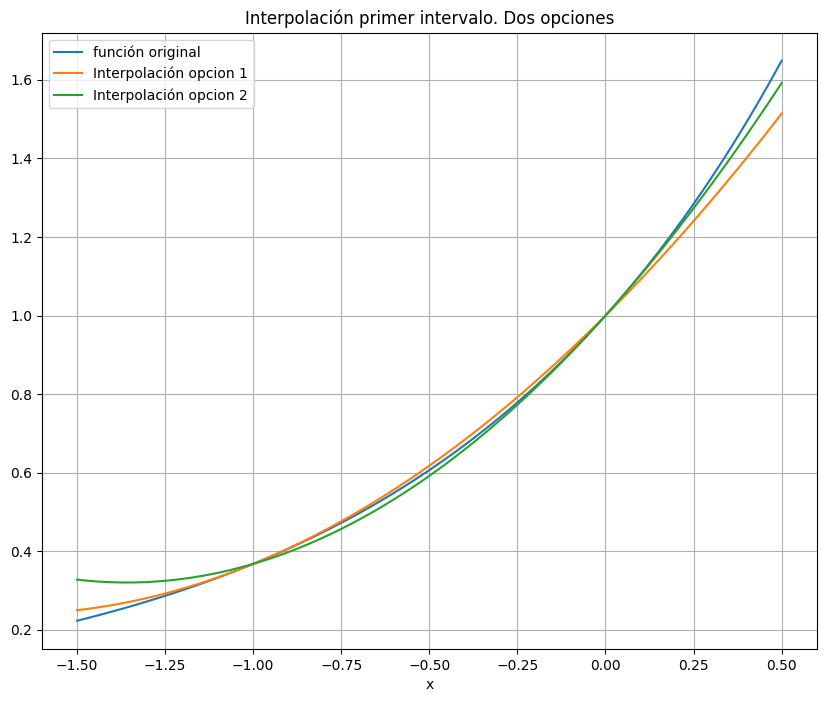

In [3]:
f = lambda x: np.e**x

p1_opcion1 = lambda x: (1 - 2/np.e)*x**2 + (2 - 3/np.e)*x + 1
p1_opcion2 = lambda x: (1/np.e)*x**2 + x + 1

a = -1
b = 0

x = np.linspace(a-0.5, b+0.5, 100)



plt.figure(figsize=(10,8))
plt.plot(x, f(x), label="función original")
plt.plot(x, p1_opcion1(x), label="Interpolación opcion 1")
plt.plot(x, p1_opcion2(x), label="Interpolación opcion 2")
plt.xlabel("x")
plt.title("Interpolación primer intervalo. Dos opciones")
plt.legend()
plt.grid(True)
plt.show()

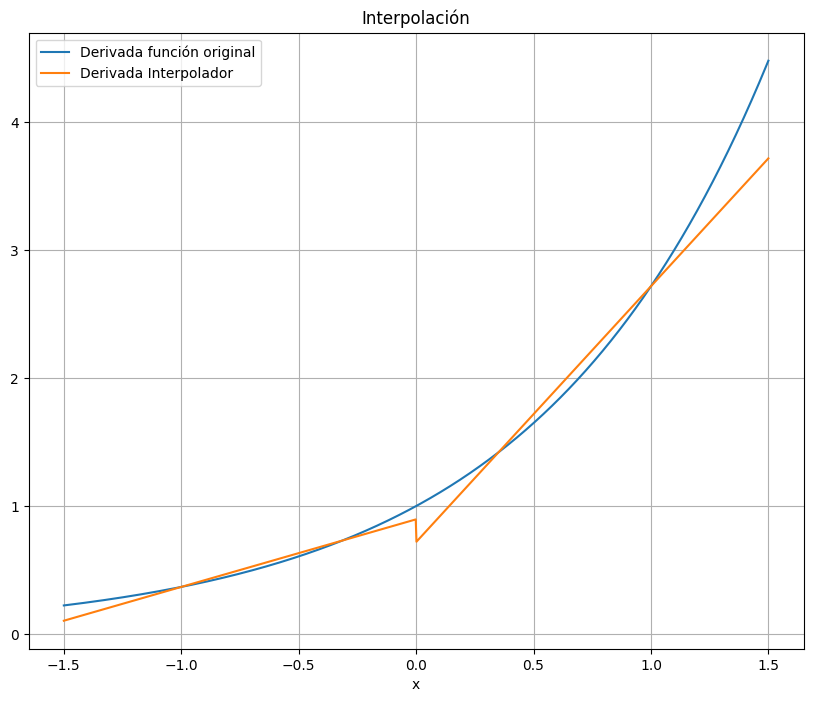

In [4]:
f = lambda x: np.e**x

p1_der = lambda x: (2 - 4/np.e)*x + (2 - 3/np.e)
p2_der = lambda x: 2*x + np.e - 2


x = np.linspace(-1.5, 1.5, 1000)

a = p1_der(x[x <= 0])
b = p2_der(x[x > 0])


plt.figure(figsize=(10,8))
plt.plot(x, f(x), label="Derivada función original")
plt.plot(x, np.concatenate((a, b)), label="Derivada Interpolador")
plt.xlabel("x")
plt.title("Interpolación")
plt.legend()
plt.grid(True)
plt.show()

## Problema 3

Plantee el sistema para interpolar vía splines cúbicos naturales los puntos:

$$
\{
(-2, 5), (-1, 4), (0, 3), (1, 0), (2, 6)    
\}
$$

Una vez hecho esto, resuelva en su computador este sistema e ilustre la solución.

Para esté metodo de interpolación a trozos, buscamos cuatro polinomios cúbicos $S_1(x)$, $S_2(x)$, $S_3(x)$ y $S_4(x)$ para cada intervalo y queremos imponer, no solo que el interpolador a trozos interpole la función en cada punto, sino que tambien su primera y segunda derivada sea continua, para así que la curva dada por el interpolador sea más suave. Tenemos entonces,

$$
S(x) = 
\begin{cases}
S_1(x),&\text{ para }x\in[-2, -1] \\
S_2(x),&\text{ para }x\in[-1, 0] \\
S_3(x),&\text{ para }x\in[0, 1] \\
S_4(x),&\text{ para }x\in[1, 2]
\end{cases}
$$
Con
$$
S_i(x) = a_i + b_ix + c_ix^2 + d_ix^3,\quad \text{para }i=\{1, 2, 3, 4\}
$$
Lo cual significa que tenemos 16 incógnitas.
Primero, queremos imponer que $S(x)$ interpole los puntos dados y que sea continua. Obtenemos 8 ecuaciones.

\begin{align*}
S_1(-2) &= a_1 - b_1 2 + c_1 4 - d_1 8 = 5 \\
S_1(-1) &= \dots = 4 \\
S_2(-1) &= \dots = 4 \\
S_2(0) &= \dots = 3 \\
S_3(0) &= \dots = 3 \\
S_3(1) &= \dots = 0 \\
S_4(1) &= \dots = 0 \\
S_4(2) &= \dots = 6 
\end{align*}

Luego queremos imponer que la primera derivada del interpolador sea continua. Obtenemos 3 ecuaciones

\begin{align*}
S_1'(-1) &= S_2'(-1) \\
S_2'(0) &= S_3'(0) \\
S_3'(1) &= S_4'(1) 
\end{align*}

Luego imponemos que la segunda derivada del interpolador sea continua. Obtenemos 3 ecuaciones

\begin{align*}
S_1''(-1) &= S_2''(-1) \\
S_2''(0) &= S_3''(0) \\
S_3''(1) &= S_4''(1) 
\end{align*}

Por último, queremos que el interpolador sea un Spline natural, lo que significa que queremos que la segunda derivada del interpolador en los extremos valga 0. Obtenemos así las últimas 2 ecuaciones.

\begin{align*}
S_1''(-2) &= 0
S_4''(2) &= 0
\end{align*}

Con estas 16 ecuaciones podemos armar un sistema y al resolverlo obtendremos los coeficientes de cada polinomio.

In [ ]:
A = np.array([
    [1,-2,4,-8,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,-1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,-1,1,-1,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,8],
    [0,1,-2,3,0,-1,2,-3,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,-1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,2,3,0,-1,-2,-3],
    [0,0,2,-6,0,0,-2,6,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,2,0,0,0,-2,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,2,6,0,0,-2,-6],
    [0,0,2,-12,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,12]
])
b = np.array([5,4,4,3,3,0,0,6,0,0,0,0,0,0,0,0])

"""
Resolvemos para obtener todos los coeficientes.
"""
x = np.linalg.solve(A, b)
nodes = [-2, -1, 0, 1, 2]

In [6]:
def create_poly(coefs, nodes):
    a1, b1, c1, d1, a2, b2, c2, d2, a3, b3, c3, d3, a4, b4, c4, d4 = coefs
    p1 = lambda x: a1 + b1*x + c1*x*x + d1*x*x*x
    p2 = lambda x: a2 + b2*x + c2*x*x + d2*x*x*x
    p3 = lambda x: a3 + b3*x + c3*x*x + d3*x*x*x
    p4 = lambda x: a4 + b4*x + c4*x*x + d4*x*x*x
    plist = [p1, p2, p3, p4]
    condlist = lambda x: [nodes[i]<= x <= nodes[i+1] for i in range(len(nodes)-1)]
    p = lambda x: np.piecewise(x, condlist(x), plist)
    return p

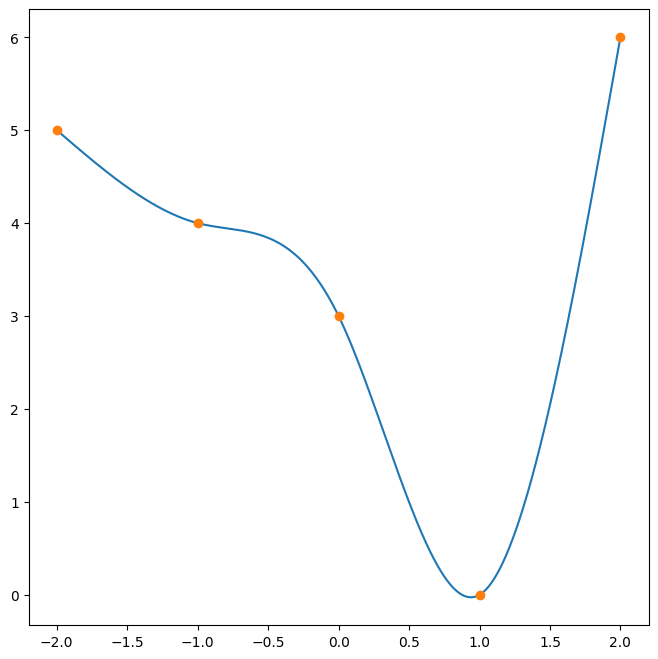

In [7]:
p = create_poly(x, nodes)

data = np.array([(-2, 5), (-1, 4), (0, 3), (1, 0), (2, 6)])

t = np.linspace(-2,2, num=1000)
pv = np.vectorize(p)

plt.figure(figsize=(8, 8))
plt.plot(t, pv(t))
plt.plot(data[:, 0], data[:, 1], "o")
plt.show()

## Problema 4

Considere la siguiente paremetrización:
$$
\begin{cases}
x(t) &= 2(1 - \cos(t))\cos(t)\\
y(t) &= 2(1 - \cos(t))\sin(t)
\end{cases}
$$
Con $t\in[0, 2\pi]$.

Utilice polinomios para interpolar $x$ e $y$ con respecto a $10$ puntos equiespaciados de $[0, 2\pi]$. Luego grafique la interpolación y comparela con el resultado real.

Para este problema interpolamos $x$ e $y$ con polinomios de grado 9. Para calcular los coeficientes de cada uno, resolvemos el sistema dado por la matriz de vandermonde.

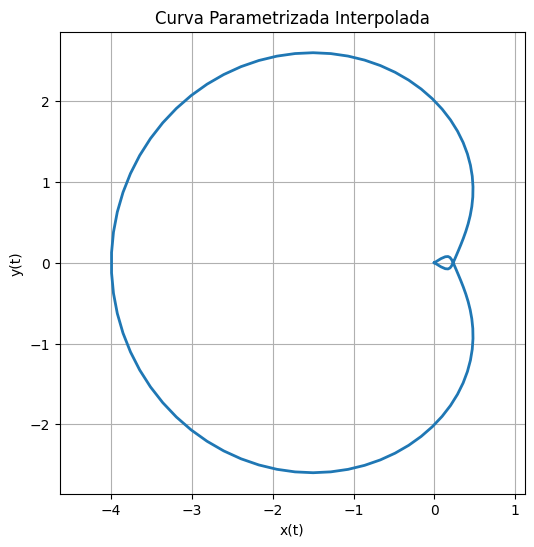

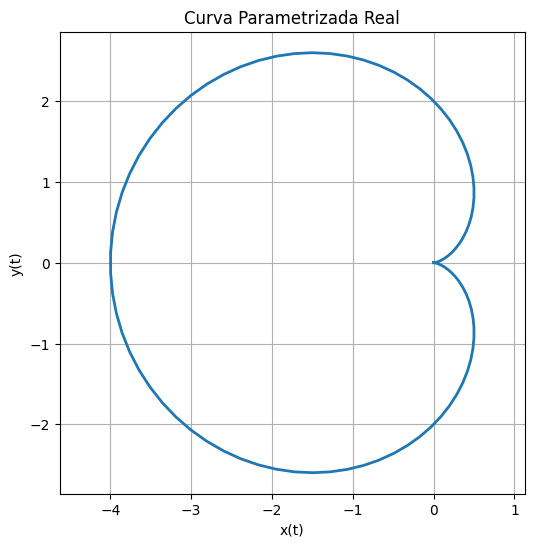

In [ ]:
x = lambda t: 2*(1 - np.cos(t))*np.cos(t)
y = lambda t: 2*(1 - np.cos(t))*np.sin(t)


"""
Armamos un arreglo con los puntos de t
"""
N = 10
t = np.linspace(0, 2*np.pi, N)

"""
Armamos la matriz de Vandermonde
"""

# COMPLETAR

"""
Resolvemos el sistema para los coeficientes de P_x y P_y
"""
coef_x = np.linalg.solve(A, x(t))
coef_y = np.linalg.solve(A, y(t))


"""
Armamos los interpoladores
"""
def P_x(t_):
    val = 0
    for i, coeficiente in enumerate(coef_x):
        val += coeficiente*t_**i
    return val

def P_y(t_):
    val = 0
    for i, coeficiente in enumerate(coef_y):
        val += coeficiente*t_**i
    return val


t = np.linspace(0, 2*np.pi, 100)

plt.figure(figsize=(6, 6))
plt.plot(P_x(t), P_y(t), lw=2)
plt.title("Curva Parametrizada Interpolada")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.axis("equal")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(x(t), y(t), lw=2)
plt.title("Curva Parametrizada Real")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.axis("equal")
plt.grid(True)
plt.show()


